In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Descripción de cada varaible
<ol>
<li> Fecha-I : Fecha y hora programada del vuelo. </li>
<li> Vlo-I : Número de vuelo programado. </li>
<li> Ori-I : Código de ciudad de origen programado. </li>
<li> Des-I : Código de ciudad de destino programado. </li>
<li> Emp-I : Código aerolínea de vuelo programado. </li>
<li> Fecha-O : Fecha y hora de operación del vuelo. </li>
<li> Vlo-O : Número de vuelo de operación del vuelo. </li>
<li> Ori-O : Código de ciudad de origen de operación </li>
<li> Des-O : Código de ciudad de destino de operación. </li>
<li> Emp-O : Código aerolínea de vuelo operado. </li>
<li> DIA : Día del mes de operación del vuelo. </li>
<li> MES : Número de mes de operación del vuelo. </li>
<li> AÑO : Año de operación del vuelo. </li>
<li> DIANOM : Día de la semana de operación del vuelo. </li>
<li> TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional. </li>
<li> OPERA : Nombre de aerolínea que opera. </li>
<li> SIGLAORI : Nombre ciudad origen. </li>
<li> SIGLADES : Nombre ciudad destino. </li>
</ol>

In [2]:
path = 'agregar ruta del directorio'

df_latam = pd.read_csv(path + '/datos/dataset_SCL.csv')

# Convertimos todos los nombres de las variables en minusculas
names_columns = []
for name in df_latam.columns:
    names_columns = names_columns + [name.lower()]

df_latam.columns = names_columns

In [3]:
df_latam.shape

(68206, 18)

In [4]:
df_latam.head()

,fecha-i,vlo-i,ori-i,des-i,emp-i,fecha-o,vlo-o,ori-o,des-o,emp-o,dia,mes,año,dianom,tipovuelo,opera,siglaori,siglades
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


# Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
<ol>
<li> temporada_alta: 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.</li>
<li> dif_min: diferencia en minutos entre Fecha-O y Fecha-I .</li>
<li> atraso_15: 1 si dif_min > 15, 0 si no.</li>
<li> periodo_dia: mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .</li>
</ol>

In [5]:
# Llevamos las variables fecha-i y fecha-o a un de formato fecha
df_latam['fecha-i'] = pd.to_datetime(df_latam['fecha-i'],format='%Y-%m-%d')
df_latam['fecha-o'] = pd.to_datetime(df_latam['fecha-o'],format='%Y-%m-%d')

In [6]:
# Construccion de la variable temporada alta
df_latam.loc[(df_latam['mes'] == 7) & (df_latam['dia'] >= 15) & (df_latam['dia'] <= 31), "temporada_alta"] = 1
df_latam.loc[(df_latam['mes'] == 9) & (df_latam['dia'] >= 11) & (df_latam['dia'] <= 30), "temporada_alta"] = 1
df_latam.loc[(df_latam['mes'] >= 1) & (df_latam['mes'] <= 2), "temporada_alta"] = 1
df_latam.loc[(df_latam['mes'] == 12) & (df_latam['dia'] >= 15), "temporada_alta"] = 1
df_latam.loc[(df_latam['mes'] == 3) & (df_latam['dia'] <= 3), "temporada_alta"] = 1
df_latam['temporada_alta'] = df_latam['temporada_alta'].fillna(0)

In [7]:
# Construccion de la variable diferencia en minutos
df_latam['dif_min'] = (df_latam['fecha-o']- df_latam['fecha-i'])/pd.Timedelta(minutes=1)

In [8]:
# Construccion de la variable que nos indica si el vuelo sufrio retraso
df_latam.loc[(df_latam['dif_min'] > 15), "atraso_15"] = 1
df_latam['atraso_15'] = df_latam['atraso_15'].fillna(0)

In [9]:
# # Construccion de la variable que nos indica el periodo del dia
df_latam['hour'] = df_latam['fecha-i'].dt.hour
df_latam.loc[(df_latam['hour'] >= 5) & (df_latam['hour'] < 12) , "periodo_dia"] = "mañana"
df_latam.loc[(df_latam['hour'] >= 12) & (df_latam['hour'] < 19) , "periodo_dia"] = "tarde"
df_latam['periodo_dia'] = df_latam['periodo_dia'].fillna("noche")
df_latam = df_latam.drop(columns=['hour'])

In [10]:
df_latam.shape

(68206, 22)

In [11]:
nuevo_df_latam = df_latam[df_latam.columns[10:]]
nuevo_df_latam.head()

,dia,mes,año,dianom,tipovuelo,opera,siglaori,siglades,temporada_alta,dif_min,atraso_15,periodo_dia
0,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,1.0,3.0,0.0,noche
1,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,1.0,9.0,0.0,noche
2,3,1,2017,Martes,I,American Airlines,Santiago,Miami,1.0,9.0,0.0,noche
3,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,1.0,3.0,0.0,noche
4,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,1.0,-2.0,0.0,noche


In [12]:
nuevo_df_latam.to_csv(path + '/repositorio/desafio_latam/synthetic_features.csv', index=False, sep = ",", decimal = ".", header = True, encoding= 'utf-8')

# ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
<ol>
<li> siglades ==>         destino </li>
<li> opera ==>            aerolínea </li>
<li> mes ==>              mes del año </li>
<li> dianom ==>           día de la semana </li>
<li> temporada_alta ==>   temporada </li>
<li> tipovuelo ==>        tipo de vuelo </li>
<ol>

In [13]:
#Se definen las funciones que seran utilizadas mas adelante
def calculo_tasa_atrasos(df, nombre_variable:str, name_target:str, nambre_variable_tasa:str):
    all_categorias = df[[nombre_variable]].drop_duplicates().reset_index(drop=True)

    df_agrup = df.groupby([nombre_variable, name_target]).agg({name_target: ['count']})
    df_agrup.columns = ['q']
    df_agrup = df_agrup.reset_index()
    df_agrup['total'] = df_agrup.groupby([nombre_variable])['q'].transform('sum')

    df_atrasos = df_agrup[df_agrup[name_target] == 1].reset_index(drop=True)
    df_atrasos[nambre_variable_tasa] = round(df_atrasos['q']/df_atrasos['total'], 2)

    all_categorias = all_categorias.join(df_atrasos[[nombre_variable, nambre_variable_tasa]].set_index(nombre_variable), on=nombre_variable)
    all_categorias[nambre_variable_tasa] = all_categorias[nambre_variable_tasa].fillna(0)
    return all_categorias

def graficas_tasas(df, string_titulo:str):
    var_x = df.columns[0]
    var_y = df.columns[1]

    fig = plt.subplots(figsize =(14, 6))
    x = df[var_x]
    y = df[var_y]
    p = plt.bar(x, y)
    plt.xticks(rotation = 90)
    plt.title("Tasa de atraso por " + string_titulo)
    plt.ylabel('Tasa de atraso')
    return(plt.show())

In [14]:
# Se calculan las tasas de atraso por cada una de las variables
df_tasa_atraso_destino = calculo_tasa_atrasos(df_latam, 'siglades', 'atraso_15', 'tasas_atrasos_destino')
df_tasa_atraso_aerolinea = calculo_tasa_atrasos(df_latam, 'opera', 'atraso_15', 'tasas_atraso_aerolinea')
df_tasa_atraso_mes = calculo_tasa_atrasos(df_latam, 'mes', 'atraso_15', 'tasas_atrasos_mes')
df_tasa_atraso_dia_semana = calculo_tasa_atrasos(df_latam, 'dianom', 'atraso_15', 'tasas_atrasos_dia_semana')
df_tasa_atraso_temporada = calculo_tasa_atrasos(df_latam, 'temporada_alta', 'atraso_15', 'tasas_atrasos_temporada')
df_tasa_atraso_tipo_vuelo = calculo_tasa_atrasos(df_latam, 'tipovuelo', 'atraso_15', 'tasas_atrasos_tipo_vuelo')

# Tasa de Atrasos por Destinos

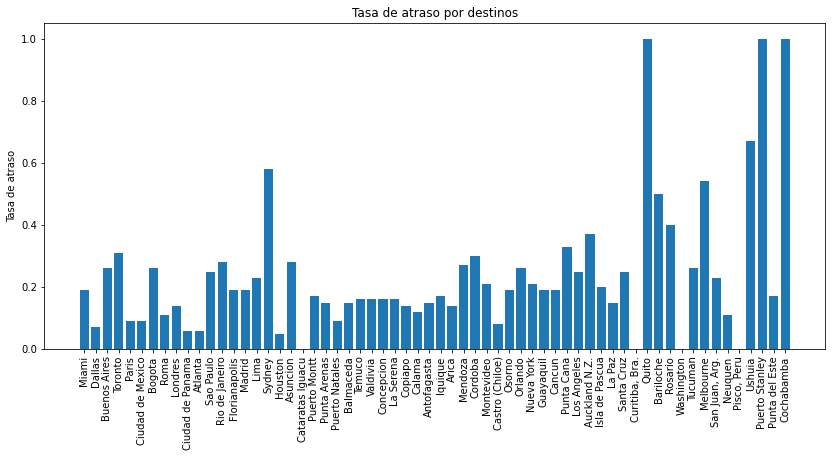

In [15]:
graficas_tasas(df_tasa_atraso_destino, 'destinos')

# Tasa de Atrasos por Aerolíneas

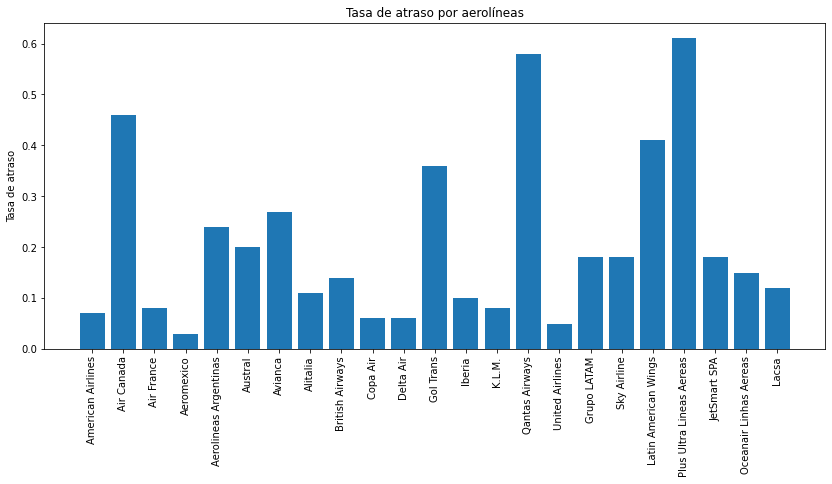

In [16]:
graficas_tasas(df_tasa_atraso_aerolinea, 'aerolíneas')

# Tasa de Atrasos por Meses del Año

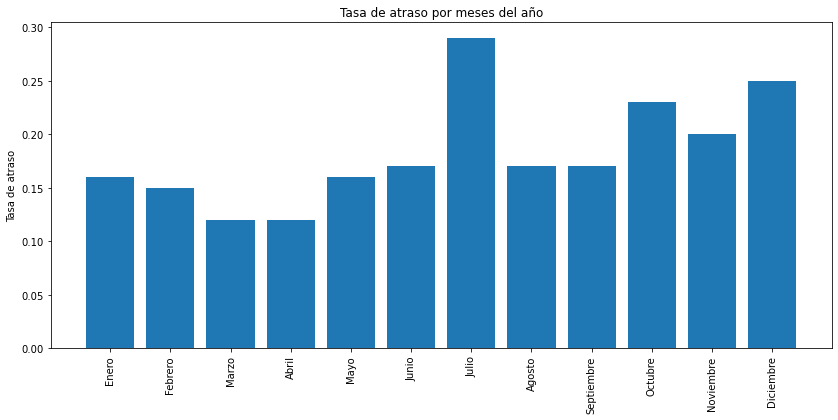

In [17]:
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
for i in range(12):
    df_tasa_atraso_mes.loc[df_tasa_atraso_mes['mes'] == i+1, 'nombre_meses'] = nombres_meses[i]
df_tasa_atraso_mes = df_tasa_atraso_mes[['nombre_meses', 'tasas_atrasos_mes', 'mes']]
graficas_tasas(df_tasa_atraso_mes, 'meses del año')

# Tasa de Atrasos por Dias de la Semana

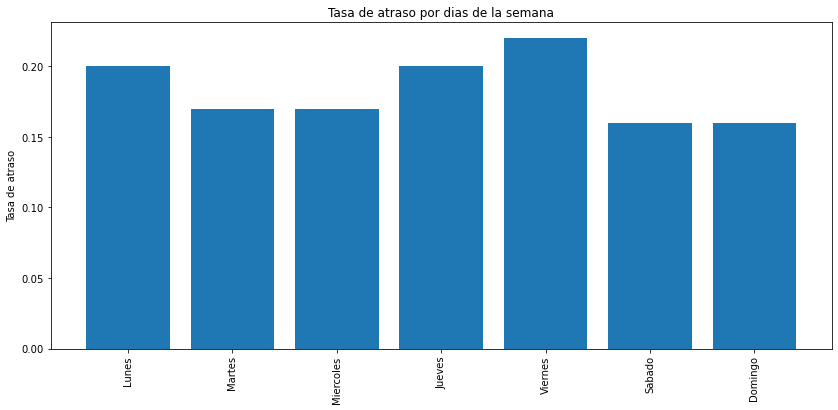

In [18]:
dias_semana = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
for j in range(7):
    df_tasa_atraso_dia_semana.loc[df_tasa_atraso_dia_semana['dianom'] == dias_semana[j], 'id_dia'] = j+1
df_tasa_atraso_dia_semana = df_tasa_atraso_dia_semana.sort_values(by='id_dia')

graficas_tasas(df_tasa_atraso_dia_semana, 'dias de la semana')

# Tasa de Atrasos por Temporada Alta o Baja

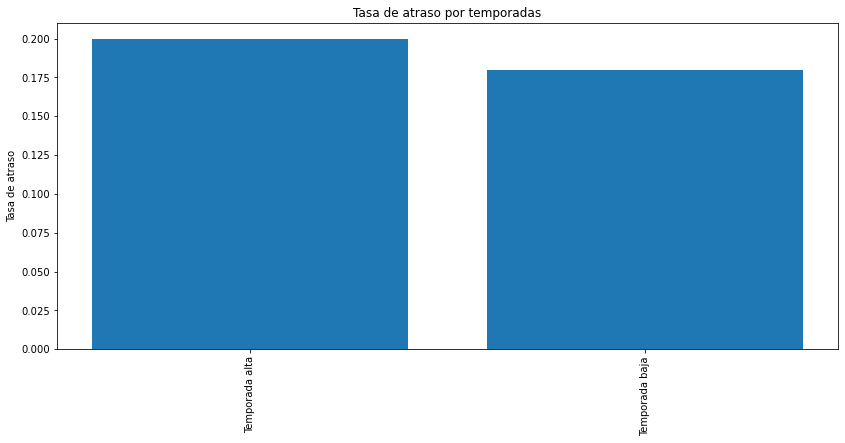

In [19]:
df_tasa_atraso_temporada.loc[df_tasa_atraso_temporada['temporada_alta'] == 1, 'tipo_temporada'] = 'Temporada alta'
df_tasa_atraso_temporada.loc[df_tasa_atraso_temporada['temporada_alta'] == 0, 'tipo_temporada'] = 'Temporada baja'
df_tasa_atraso_temporada = df_tasa_atraso_temporada[['tipo_temporada', 'tasas_atrasos_temporada', 'temporada_alta']]
df_tasa_atraso_temporada
graficas_tasas(df_tasa_atraso_temporada, 'temporadas')

# Tasa de Atrasos por Tipos de Vuelos

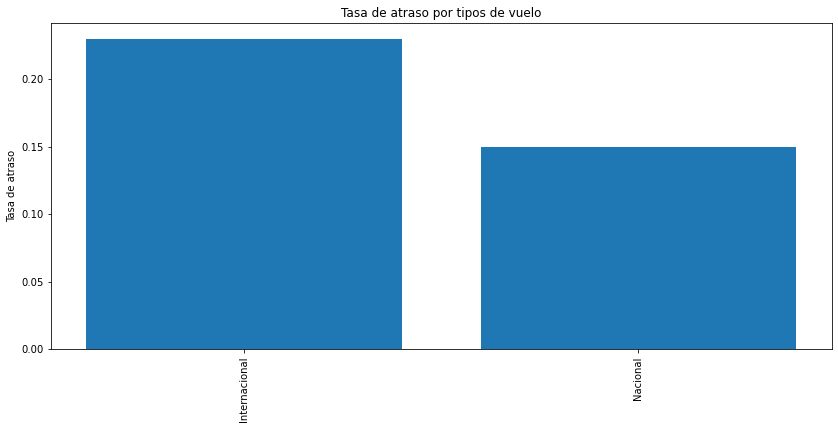

In [20]:
df_tasa_atraso_tipo_vuelo.loc[df_tasa_atraso_tipo_vuelo['tipovuelo'] == 'I', 'nombre_tipovuelo'] = 'Internacional'
df_tasa_atraso_tipo_vuelo.loc[df_tasa_atraso_tipo_vuelo['tipovuelo'] == 'N', 'nombre_tipovuelo'] = 'Nacional'
df_tasa_atraso_tipo_vuelo = df_tasa_atraso_tipo_vuelo[['nombre_tipovuelo', 'tasas_atrasos_tipo_vuelo', 'tipovuelo']]
graficas_tasas(df_tasa_atraso_tipo_vuelo, 'tipos de vuelo')

# ¿Qué variables esperarías que más influyeran en predecir atrasos?

Las variables que esperaría que ayuden a predecir los atrasos de los vuelos son:

<ol>
<li> siglades ==>         destino </li>
<li> opera ==>            aerolínea </li>
<li> tipovuelo ==>        tipo de vuelo </li>
</ol>

debido a su variabilidad en las tasas de atrasos.

Los meses del año se observa cierta variabilidad, pero los utizaria como filtro creando un modelo por cada mes del año, o bien por trimestre o semestral. 

# Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.
<ul>
<li> Siéntete libre de generar variables adicionales y/o complementar con variables externas.</ul>
</ul>

In [21]:
def creacion_columnas(df, nombre_variable: str):
    arr = df[nombre_variable].drop_duplicates().reset_index(drop=True)
    for i in range(len(arr)):
        df.loc[df[nombre_variable] == arr[i], arr[i]] = 1
        df[arr[i]] = df[arr[i]].fillna(0)
    return(df)

In [22]:
# se calcula la tasa de atraso por periodo para observar su variabilidad, no se observa mayor variabilidad
df_tasa_atraso_periodo = calculo_tasa_atrasos(df_latam, 'periodo_dia', 'atraso_15', 'tasas_atrasos_periodo')
df_tasa_atraso_periodo

,periodo_dia,tasas_atrasos_periodo
0,noche,0.20
1,tarde,0.20
2,mañana,0.16


In [23]:
# se construyen las variables que ingresaran al modelo, se decide construir el modelo con los destinos, meses del año y tipo de vuelo, estas ingresaran como varaibles
# binarias al modelo.
nuevo_df_latam = creacion_columnas(nuevo_df_latam, 'siglades')
#nuevo_df_latam = creacion_columnas(nuevo_df_latam, 'opera')
#nuevo_df_latam = creacion_columnas(nuevo_df_latam, 'periodo_dia')
#nuevo_df_latam = creacion_columnas(nuevo_df_latam, 'dianom')
nuevo_df_latam = creacion_columnas(nuevo_df_latam, 'mes')

nuevo_df_latam.loc[nuevo_df_latam['tipovuelo'] == 'I', 'tipo_vuelo'] = 1
nuevo_df_latam['tipo_vuelo'] = nuevo_df_latam['tipo_vuelo'].fillna(0)

In [24]:
# se balancean los datos, se toma la decision de sacar una muestra aleatoria de los ceros (no atraso), ya que se cree que la cantidad de 1 es suficientemente grande. 
df_cantidad_1 = nuevo_df_latam[nuevo_df_latam['atraso_15'] == 1]
df_muestra_0 = nuevo_df_latam[nuevo_df_latam['atraso_15'] == 0].sample(n=df_cantidad_1.shape[0])
df_latam_balanceado = df_cantidad_1.append(df_muestra_0, ignore_index=True).reset_index(drop=True)

df_latam_balanceado.shape

(25228, 87)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [27]:
X = df_latam_balanceado[df_latam_balanceado.columns[12:]].to_numpy()
y = df_latam_balanceado['atraso_15']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)

y_pred = algoritmo.predict(X_test)

matriz = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
exactitud = accuracy_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Precisión del modelo:', precision)
print('Exactitud del modelo:', exactitud)
print('Sensibilidad del modelo:', sensibilidad)
print('Curva ROC - AUC del modelo:', roc_auc)
print('Matriz de Confusión:')
print(matriz)

Precisión del modelo: 0.6026281208935611
Exactitud del modelo: 0.6094596379970935
Sensibilidad del modelo: 0.6135937918116136
Curva ROC - AUC del modelo: 0.6095108833797107
Matriz de Confusión:
[[2320 1512]
 [1444 2293]]


In [28]:
import math

feature_names = df_latam_balanceado.columns[12:]
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
w0 = algoritmo.intercept_[0]
w = algoritmo.coef_[0]

feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)

In [29]:
# Se observan las 50 variables que tienen mas importancia en del modelo.
feature_importance.head(50)

,feature,importance
16,Sydney,4.492194
44,Auckland N.Z.,2.545558
42,Punta Cana,2.245861
54,Melbourne,2.082662
58,Ushuia,1.974185
68,7,1.952316
34,Cordoba,1.873185
55,"San Juan, Arg.",1.783987
51,Rosario,1.765012
12,Rio de Janeiro,1.665027


Eigenvalues:
[3.05089089e-01 1.06886087e-01 1.02778846e-01 9.56957902e-02
 9.48250716e-02 8.99722666e-02 8.55162242e-02 8.12203482e-02
 7.78630397e-02 7.45043733e-02 7.30610885e-02 7.07344463e-02
 7.01054105e-02 6.82409666e-02 6.45028315e-02 6.34340470e-02
 5.87894439e-02 5.32277981e-02 4.61272341e-02 4.20512599e-02
 3.53045004e-02 3.31874410e-02 3.00468010e-02 2.77225302e-02
 2.57113482e-02 2.36552599e-02 2.28695395e-02 1.99203314e-02
 1.76358952e-02 1.57851990e-02 1.43418771e-02 1.21781125e-02
 9.79573770e-03 9.55066602e-03 7.64413359e-03 6.94572501e-03
 6.63233262e-03 5.84336082e-03 5.31250209e-03 5.08722245e-03
 4.67632324e-03 4.39549988e-03 4.13413652e-03 3.96018960e-03
 3.71910340e-03 3.41979717e-03 3.24554882e-03 3.08071946e-03
 2.95098909e-03 2.89283916e-03 2.74866479e-03 2.70016112e-03
 2.62295824e-03 1.98135502e-03 1.30674878e-03 1.02242846e-03
 9.29646602e-04 8.77326259e-04 7.31242329e-04 5.70757192e-04
 5.24202038e-04 4.43908919e-04 1.62961344e-04 1.21974111e-04
 8.31637310

Text(0, 0.5, 'Explained variance (%)')

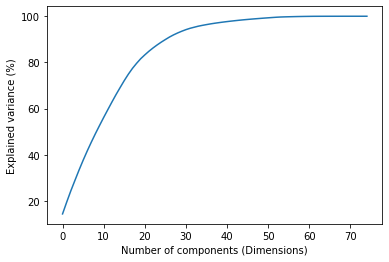

In [30]:
# Se realiza un PCA para realizar una reducción de dimensionalidad, ya que puede que sean muchas variables.
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(X)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [31]:
# Se utilizan 19 componentes ya que aproximadamente con esos se captura el 80% de la variabilidad en los datos como se puede observar en el grafico.
pca = PCA(n_components=19)
X_pca = pca.fit_transform(X)
df_X_pca = pd.DataFrame(X_pca)

In [33]:
X_pca = df_X_pca.to_numpy()
y = df_latam_balanceado['atraso_15']

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3)

algoritmo = LogisticRegression()
algoritmo.fit(X_train_pca, y_train)

y_pred = algoritmo.predict(X_test_pca)

matriz = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
exactitud = accuracy_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Precisión del modelo:', precision)
print('Exactitud del modelo:', exactitud)
print('Sensibilidad del modelo:', sensibilidad)
print('Curva ROC - AUC del modelo:', roc_auc)
print('Matriz de Confusión:')
print(matriz)

Precisión del modelo: 0.5886974151039027
Exactitud del modelo: 0.5977011494252874
Sensibilidad del modelo: 0.6202937249666222
Curva ROC - AUC del modelo: 0.5979345193870768
Matriz de Confusión:
[[2201 1623]
 [1422 2323]]


# Evalúa tu modelo. 
<ul>
<li> ¿Qué performance tiene?</li>
La performance del modelo no es la esperada, las metricas para medir dieron resultados son bajas. La idea es poder tratar de hacer que la matriz de confusión tenga menos falsos positivos y negativos.

<li>¿Qué métricas usaste para evaluar esa performance y por qué?</li>

<li>¿Por qué elegiste ese algoritmo en particular?</li>
Siento que es un modelo de clasificacion bastante robusto y se puede adecuar bastante bien a este tipo de problemas.
    
<li>¿Qué variables son las que más influyen en la predicción?</li>

<li>¿Cómo podrías mejorar la performance?</li>
Para mejorar el modelo se podría realizar una regularización lasso o ridge, crear otro tipo de variables como por ejemplo temporales, como mencione anteriomente, realizar un modelo por cada mes, otro tipo de balanceo de datos, realizar una limpieza de datos mas exhaustiva, entre otras cosas.
</ul>